In [1]:
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from metpy.cbook import get_test_data
from metpy.io import get_upper_air_data
from metpy.plots import SkewT, Hodograph

%matplotlib inline

In [2]:
from metpy.io.upperair import UseSampleData
with UseSampleData():  # Only needed to use our local sample data
    # Download and parse the data
    dataset = get_upper_air_data(datetime(1999, 5, 4, 0), 'OUN')

p = dataset.variables['pressure'][:]
T = dataset.variables['temperature'][:]
Td = dataset.variables['dewpoint'][:]
u = dataset.variables['u_wind'][:]
v = dataset.variables['v_wind'][:]

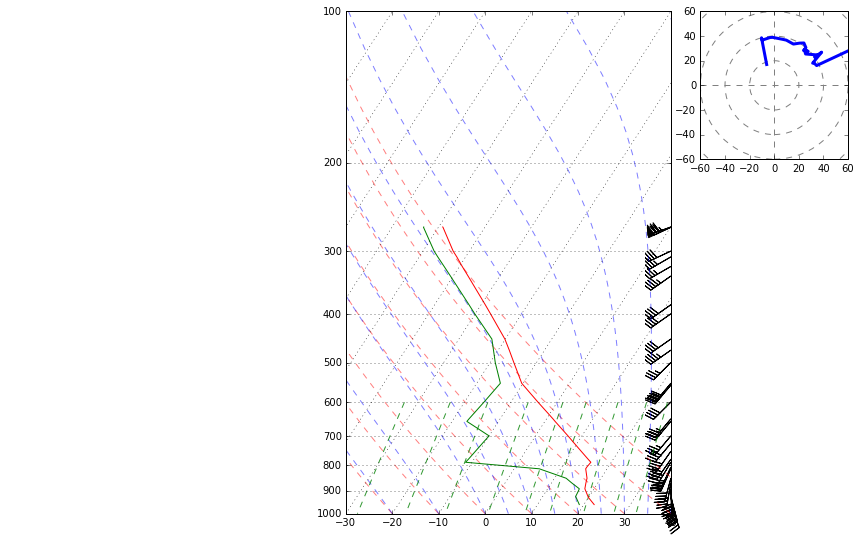

In [3]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))

# Grid for plots
gs = gridspec.GridSpec(3, 3)
skew = SkewT(fig, rotation=45, subplot=gs[:, :2])

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Good bounds for aspect ratio
skew.ax.set_xlim(-30, 40)

# Create a hodograph
ax = fig.add_subplot(gs[0, -1])
h = Hodograph(ax, component_range=60.)
h.add_grid(increment=20)
h.plot(u, v)

# Show the plot
plt.show()